<a href="https://colab.research.google.com/github/Dharshini-22112004/Live-Weather-Prediction/blob/main/Live_Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                     temperature  humidity  pressure  wind_speed  \
datetime                                                           
2025-03-06 03:00:00        24.90        77      1012        1.14   
2025-03-06 06:00:00        30.33        48      1012        0.61   
2025-03-06 09:00:00        36.38        21      1008        2.87   
2025-03-06 12:00:00        35.41        23      1008        4.35   
2025-03-06 15:00:00        27.64        58      1010        4.74   

                    weather_condition  
datetime                               
2025-03-06 03:00:00            Clouds  
2025-03-06 06:00:00            Clouds  
2025-03-06 09:00:00            Clouds  
2025-03-06 12:00:00            Clouds  
2025-03-06 15:00:00            Clouds  
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 0.7504839611258284


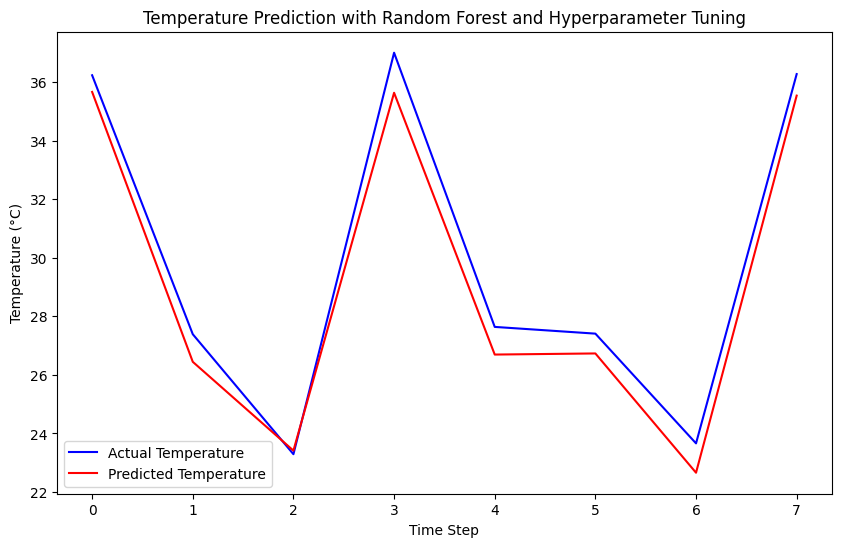

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# API Key and City
API_KEY = 'c9037142b25949112cfed1011c69bb6c'
CITY = 'Tiruchirapalli'
URL = f'http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric'

# Fetch weather data
response = requests.get(URL)
data = response.json()

# Parse the data
weather_data = []
for entry in data['list']:
    weather_data.append({
        'datetime': entry['dt_txt'],
        'temperature': entry['main']['temp'],
        'humidity': entry['main']['humidity'],
        'pressure': entry['main']['pressure'],
        'wind_speed': entry['wind']['speed'],
        'weather_condition': entry['weather'][0]['main']
    })

# Convert to DataFrame
df = pd.DataFrame(weather_data)
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)
print(df.head())

# Encode weather conditions
df['weather_condition'] = pd.Categorical(df['weather_condition']).codes

# Prepare data for prediction
df['hour'] = df.index.hour
X = df[['hour', 'humidity', 'pressure', 'wind_speed', 'weather_condition']]
y = df['temperature']

# Data Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model with Random Forest and Hyperparameter Tuning
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Temperature', color='blue')
plt.plot(y_pred, label='Predicted Temperature', color='red')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.title('Temperature Prediction with Random Forest and Hyperparameter Tuning')
plt.show()